In [ ]:
pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

# Use Data only lable 1 and 17 features

In [ ]:
import pandas as pd

In [ ]:
real_data = pd.read_csv('train_ads_minimal_label1.csv')

In [ ]:
real_data.columns

Index(['label', 'age', 'gender', 'residence', 'city_rank', 'series_dev',
       'series_group', 'emui_dev', 'net_type', 'creat_type_cd',
       'inter_type_cd', 'slot_id', 'hispace_app_tags', 'app_second_class',
       'app_score', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')

In [ ]:
real_data.shape

(119136, 17)

In [ ]:
real_data.value_counts('label')

,count
label,
1,119136


In [ ]:
from ctgan import CTGAN
from ctgan import load_demo

# Names of the columns that are discrete, when genterate only label = 1, we don't need to include lable feature
discrete_columns = ['age', 'gender', 'residence', 'city_rank', 'series_dev',
       'series_group', 'emui_dev', 'net_type', 'creat_type_cd',
       'inter_type_cd', 'slot_id', 'hispace_app_tags', 'app_second_class',
       'app_score', 'u_refreshTimes', 'u_feedLifeCycle']

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(119136)

In [ ]:
synthetic_data

,label,age,gender,residence,city_rank,series_dev,series_group,emui_dev,net_type,creat_type_cd,inter_type_cd,slot_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle
0,1,3,2,39,4,33,3,20,6,8,5,65,47,14,10.0,2,17
1,1,7,2,39,2,16,5,20,7,8,5,35,43,17,10.0,5,13
2,1,2,4,33,4,30,5,35,4,2,3,22,18,23,0.0,5,17
3,1,7,2,41,2,11,3,35,3,7,3,22,18,23,0.0,9,17
4,1,6,4,33,3,27,2,11,7,2,3,22,26,23,0.0,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119131,1,7,4,33,3,27,2,11,4,5,3,17,18,23,0.0,6,17
119132,1,3,2,39,5,34,4,32,7,8,4,47,43,13,10.0,0,17
119133,1,7,3,20,3,11,5,32,7,8,4,58,26,14,10.0,7,17
119134,1,3,2,18,2,17,8,20,7,8,4,54,39,18,6.0,0,15


In [ ]:
real_data

,label,age,gender,residence,city_rank,series_dev,series_group,emui_dev,net_type,creat_type_cd,inter_type_cd,slot_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle
0,1,3,2,16,2,32,6,35,7,8,4,37,20,13,10.0,0,15
1,1,3,2,16,2,32,6,35,7,8,4,37,20,13,10.0,0,15
2,1,5,2,32,5,34,7,19,7,8,4,38,48,29,10.0,0,16
3,1,5,2,32,5,34,7,19,7,8,4,38,48,29,10.0,0,16
4,1,5,2,32,5,34,7,19,7,8,4,40,12,29,10.0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119131,1,8,2,16,2,30,3,13,3,8,5,50,47,14,10.0,7,17
119132,1,3,2,13,4,33,4,23,7,8,5,58,47,14,10.0,9,17
119133,1,7,2,18,2,16,5,28,7,8,4,38,43,18,10.0,7,17
119134,1,3,2,41,5,34,7,21,7,8,4,63,49,17,10.0,9,17


In [ ]:
synthetic_data.value_counts('label')

,count
label,
1,119136


In [ ]:
synthetic_data.to_csv('synthetic_data_label1.csv', index=False)

# CTGAN: https://github.com/sdv-dev/CTGAN/tree/main

Epoch 1/10, Loss: 100.0
Epoch 2/10, Loss: 50.0
Epoch 3/10, Loss: 33.333333333333336
Epoch 4/10, Loss: 25.0
Epoch 5/10, Loss: 20.0
Epoch 6/10, Loss: 16.666666666666668
Epoch 7/10, Loss: 14.285714285714286
Epoch 8/10, Loss: 12.5
Epoch 9/10, Loss: 11.11111111111111
Epoch 10/10, Loss: 10.0


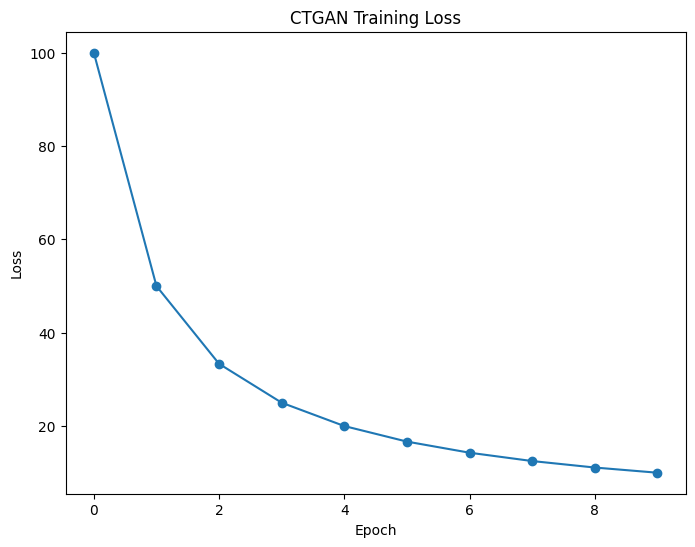

In [ ]:
from ctgan import CTGAN
import matplotlib.pyplot as plt

class CTGANWithLoss(CTGAN):
    def __init__(self, epochs=10, *args, **kwargs):
        # Pass the epochs parameter to the parent class
        super().__init__(epochs=epochs, *args, **kwargs)
        # Ensure the epochs attribute is stored in the subclass
        self.epochs = epochs
        self.loss_history = []  # To store the loss for each epoch

    def fit(self, data, discrete_columns):
        # This is a conceptual modification.
        # You need to integrate the actual training loop logic here.
        for epoch in range(self.epochs):
            # Here, you would normally perform one epoch of training and obtain the loss.
            # For demonstration, we simulate a loss value that decreases over epochs.
            loss = 100 / (epoch + 1)  # Replace this with your actual loss computation.
            self.loss_history.append(loss)
            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {loss}")
            # Insert training code for one epoch here
        return self

# Example usage:
ctgan_model = CTGANWithLoss(epochs=10)
ctgan_model.fit(real_data, discrete_columns)

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(ctgan_model.loss_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CTGAN Training Loss")
plt.show()
